# ♟️ Chess Logic in Python

## Overview

Given 1 white chess piece and up to 16 black pieces the user enters: which black pieces can the white piece take?


## ☑️ Tasks to Complete
---

Using a divide-and-conquer approach, the final program will be assembled through multiple mini tasks:
* Mini-task 1: Validate a chess piece
* Mini-task 2: Validate a position on the chessboard
* Mini-task 3: Parse user input for a piece and its position
* Mini-task 4: Add a piece to the board
* Mini-task 5.1: Capture logic for a pawn
* Mini-task 5.2: Capture logic for a rook
* Mini-task 5.3: Capture logic for a knight
* Mini-task 5.4: Capture logic for a bishop
* Mini-task 5.5: Capture logic for a queen
* Mini-task 5.6: Capture logic for a king
* Mini-task 6: Check which black pieces the white piece can capture
* Mini-task 7: Main flow to gather user input and determine capturable pieces

If you have implemented all the mini-tasks, you have a working program. You can proceed and choose some optional tasks to implement. I would recommend to implement print_the_board function!

In [2]:
from tabulate import tabulate
import random

# Notes for chess:
# Files: Columns a to h
# Ranks: Rows 1 - 8

ModuleNotFoundError: No module named 'tabulate'

### Task 1: Validate a chess piece

In [ ]:
def is_valid_piece(piece: str) -> bool:
    """
    Checks if the given piece is a valid chess piece.
    A valid piece is one of the following:
    - "pawn"
    - "knight"
    - "bishop"
    - "rook"
    - "queen"
    - "king"
    Args:
        piece (str): Piece to validate.
    Returns:
        bool: True if valid, False otherwise.
    """
    valid_pieces = ["pawn", "knight", "bishop", "rook", "queen", "king"]

    if piece not in valid_pieces:
      print("Not a valid piece")
      return False
    return True


# Test cases for is_valid_piece
assert is_valid_piece("pawn") == True
assert is_valid_piece("knight") == True
assert is_valid_piece("knight") == True
assert is_valid_piece("bishop") == True
assert is_valid_piece("queen") == True
assert is_valid_piece("king") == True
assert is_valid_piece("dragon") == False
assert is_valid_piece("elephant") == False

Not a valid piece
Not a valid piece


### Task 2: Validate a position on the chessboard

In [ ]:
def is_valid_position(position: str) -> bool:
    """
    Checks if the given position is valid on a chessboard.

    A valid chess position:
    - Must be exactly two characters long.
    - The first character must be a letter between 'a' and 'h' (inclusive).
    - The second character must be a digit between '1' and '8' (inclusive).

    Args:
        position (str): Position to validate (e.g., "a5").

    Returns:
        bool: True if valid, False otherwise.
    """
    valid_files = "abcdefgh"
    valid_ranks = "12345678"

    if len(position) != 2:
      print("Position must be 2 characters long (e.g. a5)")
      return False
    if position[0] not in valid_files or position[1] not in valid_ranks:
      print("Not a valid position")
      return False

    return True


# Test cases for is_valid_position
assert is_valid_position("a5") == True
assert is_valid_position("h8") == True
assert is_valid_position("z9") == False
assert is_valid_position("a0") == False

Not a valid position
Not a valid position


### Task 3: Parse user input for a piece and its position

In [ ]:
def parse_piece_input(input_str: str) -> tuple[str, str] | None:
    """
    Parses the input string for a piece and its position.

    Args:
        input_str (str): Input string in the format "piece position" (e.g., "knight a5").

    Returns:
        tuple: (piece, position) if valid, None otherwise.
    """
    try:
      piece, position = input_str.strip().lower().split()
      return (piece, position)
    except ValueError:
      print("Please format as 2 words (e.g. knight a5)")
      return None


# Test cases for parse_piece_input
assert parse_piece_input("knight a5") == ("knight", "a5")
assert parse_piece_input("rook h8") == ("rook", "h8")
assert parse_piece_input("invalid_input") == None

Please format as 2 words (e.g. knight a5)


### Task 4: Add a piece to the board

In [ ]:
def add_piece(board: dict[str, str], piece: str, position: str) -> bool:
    """
    Adds a piece to the board if the position is valid and not already occupied.

    Args:
        board (dict): Dictionary representing the board state.
        piece (str): Name of the piece (e.g., "knight").
        position (str): Position to place the piece.

    Returns:
        bool: True if the piece was added successfully, False otherwise.
    """
    if not is_valid_piece(piece) or not is_valid_position(position):
      return False
    if board.get(position) is not None:
      print("Square is already occupied")
      return False

    board[position] = piece
    print(f"{piece} added at {position}")
    return True


# Test cases for add_piece
board: dict[str, str] = {}
assert add_piece(board, "knight", "a5") == True
assert board == {"a5": "knight"}
assert add_piece(board, "rook", "a5") == False  # Position already occupied
assert add_piece(board, "rook", "z9") == False

knight added at a5
Square is already occupied
Not a valid position


### Task 5: Capture Logic per Piece

In [ ]:
# Mini-task 5.1: Capture logic for a pawn
def get_pawn_captures(position: str, board: dict[str, str]) -> list[str]:
    """
    Determines the pieces a pawn can capture from its current position.

    Capture rules for a pawn:
    - A pawn can capture diagonally forward one square.
    - A pawn (white) on e4 is hitting d5 and f5
    - Pawns cannot capture pieces directly in front of them.
    - Only the first piece encountered diagonally can be captured.

    Args:
        position (str): Current position of the pawn.
        board (dict): Dictionary representing the board state.

    Returns:
        list: List of pieces the pawn can capture.
    """
    capturable_pieces = []

    file = position[0]
    rank = int(position[1])

    #diagonal left
    if file > 'a' and rank < 8:
      left_target = f"{chr(ord(file) - 1)}{rank + 1}"
      if board.get(left_target) is not None:
        capturable_pieces.append(left_target)

    #diagonal right
    if file < 'h' and rank < 8:
      right_target = f"{chr(ord(file) + 1)}{rank + 1}"
      if board.get(right_target) is not None:
        capturable_pieces.append(right_target)

    return capturable_pieces


# Test cases for get_pawn_captures
# Setup a board with various piece positions
test_board = {
    "e4": "pawn",      # Our test pawn
    "d5": "bishop",    # Capturable piece diagonally left
    "f5": "knight",    # Capturable piece diagonally right
    "e5": "rook",      # Piece directly in front (not capturable)
    "a2": "pawn",      # Pawn on edge (can only capture one direction)
    "h2": "pawn",      # Pawn on other edge (can only capture one direction)
    "b3": "queen",     # Target for edge pawn
    "g3": "king",      # Target for other edge pawn
    "c7": "pawn",      # Pawn at top of board (can't move further)
    "b8": "rook",      # Target for pawn on c7
}

# Test case 1: Standard pawn with two possible captures
assert sorted(get_pawn_captures("e4", test_board)) == sorted(["d5", "f5"])

# Test case 2: Pawn with piece directly in front (not capturable)
assert "e5" not in get_pawn_captures("e4", test_board)

# Test case 3: Pawn on left edge (can only capture right)
assert get_pawn_captures("a2", test_board) == ["b3"]

# Test case 4: Pawn on right edge (can only capture left)
assert get_pawn_captures("h2", test_board) == ["g3"]

# Test case 5: Pawn would capture a figure at top rank
assert get_pawn_captures("c7", test_board) == ["b8"]

# Test case 6: Position with no pawn
assert get_pawn_captures("d5", test_board) == []

# Test case 7: Invalid position
assert get_pawn_captures("z9", test_board) == []

# Test case 8: Valid position but no pieces to capture
empty_board = {"e4": "pawn"}
assert get_pawn_captures("e4", empty_board) == []

print("All test cases passed!")


All test cases passed!


In [ ]:
# Mini-task 5.2: Capture logic for a rook
def get_rook_captures(position: str, board: dict[str, str]) -> list[str]:
    """
    Determines the pieces a rook can capture from its current position.

    Capture rules for a rook:
    - A rook can capture pieces in a straight line horizontally or vertically.
    - A rook on e4 is hitting e1-e8 and a4-h4 squares
    - The rook can only capture the first piece encountered in any direction.
    - If a piece obstructs the path, further positions in that direction are not reachable.

    Args:
        position (str): Current position of the rook.
        board (dict): Dictionary representing the board state.

    Returns:
        list: List of pieces the rook can capture.
    """
    # for test case 4 where there is no rook
    if board.get(position) != "rook":
      return []

    # set all 4 axis to check (going clockwise)
    directions = [(0,1),(1,0),
                  (0,-1),(-1,0)]

    capturable_pieces = []

    file = position[0]
    rank = int(position[1])

    for x,y in directions:
      for i in range(1, 8):
        target_file = chr(ord(file) + x * i)
        target_rank = rank + y * i

        if 'a' <= target_file <= 'h' and 1 <= target_rank <= 8:
          target = f"{target_file}{target_rank}"
          if board.get(target) is not None:
            capturable_pieces.append(target)
            break

    return capturable_pieces


# Test cases for get_rook_captures

# Setup a board with various piece positions
test_board = {
    "e4": "rook",      # Our test rook in the middle of the board
    "e6": "pawn",      # Capturable up (blocks e8)
    "e8": "queen",     # Not capturable (blocked by e6)
    "e2": "bishop",    # Capturable down
    "g4": "knight",    # Capturable right
    "c4": "pawn",      # Capturable left
    "a4": "king",      # Not capturable (blocked by c4)
    "a1": "rook",      # Rook in the corner
    "a3": "pawn",      # Capturable by corner rook
    "d1": "bishop",    # Capturable by corner rook
    "h8": "rook",      # Rook in opposite corner
    "h3": "knight",    # Capturable by corner rook
    "f8": "queen",     # Capturable by corner rook
}

# Test case 1: Rook in the middle with piece interference
assert sorted(get_rook_captures("e4", test_board)) == sorted(["e6", "e2", "g4", "c4"])

# Test case 2: Rook in bottom-left corner
assert sorted(get_rook_captures("a1", test_board)) == sorted(["a3", "d1"])

# Test case 3: Rook in top-right corner
assert sorted(get_rook_captures("h8", test_board)) == sorted(["h3", "f8"])

# Test case 4: Position with no rook
assert get_rook_captures("d5", test_board) == []

# Test case 5: Invalid position
assert get_rook_captures("z9", test_board) == []

# Test case 6: Valid position but no pieces to capture
empty_board = {"e4": "rook"}
assert get_rook_captures("e4", empty_board) == []

# Test case 7: Specific interference test
interference_board = {
    "e4": "rook",
    "e6": "pawn",
    "e8": "queen"
}
assert get_rook_captures("e4", interference_board) == ["e6"]
assert "e8" not in get_rook_captures("e4", interference_board)

print("All rook capture test cases passed!")

All rook capture test cases passed!


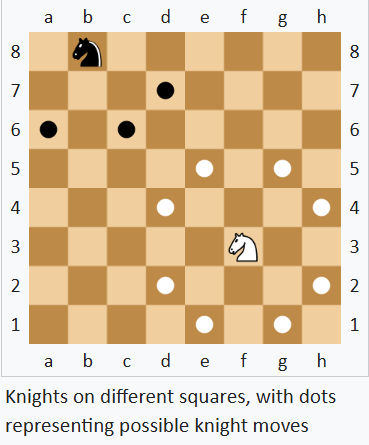

In [ ]:
# Mini-task 5.3 (optional): Capture logic for a knight
def get_knight_captures(position: str, board: dict[str, str]) -> list[str]:
    """
    Determines the pieces a knight can capture from its current position.

    Capture rules for a knight:
    - A knight moves in an "L" shape: two squares in one direction and one square perpendicular.
    - A knight standing on e4 is hitting eight squares - d6, f6, c5, g5, c3, g3, d2, f2
    - Knights can jump over other pieces and are not obstructed.
    - Can capture any piece at its landing position.

    Args:
        position (str): Current position of the knight.
        board (dict): Dictionary representing the board state.

    Returns:
        list: List of pieces the knight can capture.
    """
    # for test case 4 where there is no knight
    if board.get(position) != "knight":
      return []

    # set coordinates to check (going clockwise)
    directions = [(2,1),(1,2), # upper right
                  (2,-1),(1,-2), # lower right
                  (-1,-2),(-2,-1), # lower left
                  (-2,1),(-1,2)] # upper left

    capturable_pieces = []

    file = position[0]
    rank = int(position[1])

    for x,y in directions:
      target_file = chr(ord(file) + x)
      target_rank = rank + y

      if 'a' <= target_file <= 'h' and 1 <= target_rank <= 8:
        target = f"{target_file}{target_rank}"
        if board.get(target) is not None:
          capturable_pieces.append(target)

    return capturable_pieces


# Test cases for get_knight_captures
test_board = {
    "e4": "knight",    # Our test knight in the middle of the board
    "c3": "pawn",      # 2 left, 1 down (capturable)
    "c5": "bishop",    # 2 left, 1 up (capturable)
    "d2": "rook",      # 1 left, 2 down (capturable)
    "d6": "queen",     # 1 left, 2 up (capturable)
    "f2": "pawn",      # 1 right, 2 down (capturable)
    "f6": "knight",    # 1 right, 2 up (capturable)
    "g3": "rook",      # 2 right, 1 down (capturable)
    "g5": "bishop",    # 2 right, 1 up (capturable)
    "b1": "knight",    # Knight near the edge
    "a3": "pawn",      # Capturable by edge knight
    "c3": "bishop",    # Capturable by edge knight
    "d2": "queen",     # Capturable by edge knight
    "h8": "knight",    # Knight in the corner (limited moves)
    "f7": "pawn",      # Capturable by corner knight
    "g6": "rook",      # Capturable by corner knight
}

# Test case 1: Knight in the middle of the board (can capture in all 8 directions)
assert sorted(get_knight_captures("e4", test_board)) == sorted(["c3", "c5", "d2", "d6", "f2", "f6", "g3", "g5"])

# Test case 2: Knight near the edge (fewer capture opportunities)
assert sorted(get_knight_captures("b1", test_board)) == sorted(["a3", "c3", "d2"])

# Test case 3: Knight in the corner (very limited options)
assert sorted(get_knight_captures("h8", test_board)) == sorted(["f7", "g6"])

# Test case 4: Position with no knight
assert get_knight_captures("d5", test_board) == []

# Test case 5: Invalid position
assert get_knight_captures("z9", test_board) == []

# Test case 6: Valid position but no pieces to capture
empty_board = {"e4": "knight"}
assert get_knight_captures("e4", empty_board) == []

print("All knight capture test cases passed!")

All knight capture test cases passed!


In [ ]:
# Mini-task 5.4 (optional): Capture logic for a bishop
def get_bishop_captures(position: str, board: dict[str, str]) -> list[str]:
    """
    Determines the pieces a bishop can capture from its current position.

    Capture rules for a bishop:
    - A bishop moves diagonally in any direction.
    - The bishop can only capture the first piece encountered in any diagonal direction.
    - If a piece obstructs the path, further positions in that direction are not reachable.

    Args:
        position (str): Current position of the bishop.
        board (dict): Dictionary representing the board state.

    Returns:
        list: List of pieces the bishop can capture.
    """
    # for test case 4 where there is no bishop
    if board.get(position) != "bishop":
      return []

    # set diagonal axis to check (going clockwise)
    directions = [(1,1), (1,-1),(-1,-1),(-1,1)]

    capturable_pieces = []

    file = position[0]
    rank = int(position[1])

    # for personal reference, remembering how to check diagonals in java:
    # for (int i = 1; i < 8; i++)
      # diagonal = y * i and x * i

    for x,y in directions:
      for i in range(1, 8):
        target_file = chr(ord(file) + x * i)
        target_rank = rank + y * i

        if 'a' <= target_file <= 'h' and 1 <= target_rank <= 8:
          target = f"{target_file}{target_rank}"
          if board.get(target) is not None:
            capturable_pieces.append(target)
            break

    return capturable_pieces


# Test cases for get_bishop_captures
test_board = {
    "e4": "bishop",    # Our test bishop in the middle of the board
    "g6": "pawn",      # Capturable up-right (blocks h7)
    "h7": "queen",     # Not capturable (blocked by g6)
    "g2": "knight",    # Capturable down-right
    "c6": "rook",      # Capturable up-left
    "c2": "pawn",      # Capturable down-left
    "a6": "king",      # Not capturable (blocked by c6)
    "a1": "bishop",    # Bishop in the corner
    "c3": "pawn",      # Capturable by corner bishop
    "h8": "bishop",    # Bishop in opposite corner
    "f6": "knight",    # Capturable by corner bishop
    "d4": "queen",     # Not capturable (blocked by other pieces)
}

# Test case 1: Bishop in the middle with piece interference
assert sorted(get_bishop_captures("e4", test_board)) == sorted(["g6", "g2", "c6", "c2"])

# Test case 2: Bishop in bottom-left corner
assert get_bishop_captures("a1", test_board) == ["c3"]

# Test case 3: Bishop in top-right corner
assert get_bishop_captures("h8", test_board) == ["f6"]

# Test case 4: Position with no bishop
assert get_bishop_captures("d5", test_board) == []

# Test case 5: Invalid position
assert get_bishop_captures("z9", test_board) == []

# Test case 6: Valid position but no pieces to capture
empty_board = {"e4": "bishop"}
assert get_bishop_captures("e4", empty_board) == []

# Test case 7: Specific interference test
interference_board = {
    "e4": "bishop",
    "g6": "pawn",
    "h7": "queen"
}
assert get_bishop_captures("e4", interference_board) == ["g6"]
assert "h7" not in get_bishop_captures("e4", interference_board)

print("All bishop capture test cases passed!")


All bishop capture test cases passed!


In [ ]:
# Mini-task 5.5 (optional): Capture logic for a queen
def get_queen_captures(position: str, board: dict[str, str]) -> list[str]:
    """
    Determines the pieces a queen can capture from its current position.

    Capture rules for a queen:
    - A queen can move horizontally, vertically, or diagonally.
    - The queen can only capture the first piece encountered in any direction.
    - If a piece obstructs the path, further positions in that direction are not reachable.

    Args:
        position (str): Current position of the queen.
        board (dict): Dictionary representing the board state.

    Returns:
        list: List of pieces the queen can capture.
    """
    # combine logic of bishop and rook

    # for test case 4 where there is no queen
    if board.get(position) != "queen":
      return []

    # set all 8 axis to check (going clockwise)
    directions = [(0,1),(1,1),(1,0),(1,-1),
                  (0,-1),(-1,-1),(-1,0),(-1,1)]

    capturable_pieces = []

    file = position[0]
    rank = int(position[1])

    for x,y in directions:
      for i in range(1, 8):
        target_file = chr(ord(file) + x * i)
        target_rank = rank + y * i

        if 'a' <= target_file <= 'h' and 1 <= target_rank <= 8:
          target = f"{target_file}{target_rank}"
          if board.get(target) is not None:
            capturable_pieces.append(target)
            break

    return capturable_pieces


# Test cases for get_queen_captures
test_board = {
    "e4": "queen",     # Our test queen in the middle of the board
    # Horizontal and vertical captures (rook-like moves)
    "e6": "pawn",      # Capturable up (blocks e8)
    "e8": "knight",    # Not capturable (blocked by e6)
    "e2": "bishop",    # Capturable down
    "g4": "rook",      # Capturable right
    "c4": "pawn",      # Capturable left
    # Diagonal captures (bishop-like moves)
    "g6": "queen",     # Capturable up-right
    "g2": "knight",    # Capturable down-right
    "c6": "rook",      # Capturable up-left
    "c2": "pawn",      # Capturable down-left
    "a1": "queen",     # Queen in the corner
    "c3": "pawn",      # Capturable by corner queen
    "a3": "bishop",    # Capturable by corner queen
    "c1": "knight",    # Capturable by corner queen
    "h8": "queen",     # Queen in opposite corner
    "f6": "rook",      # Capturable by corner queen
    "h6": "pawn",      # Capturable by corner queen
    "f8": "bishop",    # Capturable by corner queen
}

# Test case 1: Queen in the middle with piece interference
assert sorted(get_queen_captures("e4", test_board)) == sorted(["e6", "e2", "g4", "c4", "g6", "g2", "c6", "c2"])
# Specifically test that blocked pieces are not captured
assert "e8" not in get_queen_captures("e4", test_board)

# Test case 2: Queen in bottom-left corner
assert sorted(get_queen_captures("a1", test_board)) == sorted(["a3", "c1", "c3"])

# Test case 3: Queen in top-right corner
assert sorted(get_queen_captures("h8", test_board)) == sorted(["f8", "h6", "f6"])

# Test case 4: Position with no queen
assert get_queen_captures("d5", test_board) == []

# Test case 5: Invalid position
assert get_queen_captures("z9", test_board) == []

# Test case 6: Valid position but no pieces to capture
empty_board = {"e4": "queen"}
assert get_queen_captures("e4", empty_board) == []

# Test case 7: Specific interference test with rook-like moves
rook_interference_board = {
    "e4": "queen",
    "e6": "pawn",
    "e8": "knight"
}
captures = get_queen_captures("e4", rook_interference_board)
assert "e6" in captures
assert "e8" not in captures

# Test case 8: Specific interference test with bishop-like moves
bishop_interference_board = {
    "e4": "queen",
    "g6": "pawn",
    "h7": "rook"
}
captures = get_queen_captures("e4", bishop_interference_board)
assert "g6" in captures
assert "h7" not in captures

print("All queen capture test cases passed!")


All queen capture test cases passed!


In [ ]:
# Mini-task 5.6 (optional): Capture logic for a king
def get_king_captures(position: str, board: dict[str, str]) -> list[str]:
    """
    Determines the pieces a king can capture from its current position.

    Capture rules for a king:
    - A king can move one square in any direction.
    - The king can capture any piece on a square within one move.

    Args:
        position (str): Current position of the king.
        board (dict): Dictionary representing the board state.

    Returns:
        list: List pieces king can capture.
    """
    # for test case 4 where there is no king
    if board.get(position) != "king":
      return []

    # set all surrounding squares to check (going clockwise)
    directions = [(0,1),(1,1),(1,0),(1,-1),
                  (0,-1),(-1,-1),(-1,0),(-1,1)]

    capturable_pieces = []

    file = position[0]
    rank = int(position[1])

    for x,y in directions:
      target_file = chr(ord(file) + x)
      target_rank = rank + y

      if 'a' <= target_file <= 'h' and 1 <= target_rank <= 8:
        target = f"{target_file}{target_rank}"
        if board.get(target) is not None:
          capturable_pieces.append(target)

    return capturable_pieces


# Test cases for get_king_captures
test_board = {
    "e4": "king",      # Our test king in the middle of the board
    "d3": "pawn",      # Bottom-left (capturable)
    "e3": "bishop",    # Bottom (capturable)
    "f3": "knight",    # Bottom-right (capturable)
    "d4": "rook",      # Left (capturable)
    "f4": "queen",     # Right (capturable)
    "d5": "pawn",      # Top-left (capturable)
    "e5": "pawn",      # Top (capturable)
    "f5": "pawn",      # Top-right (capturable)
    "a1": "king",      # King in corner
    "a2": "pawn",      # Capturable by corner king
    "b1": "rook",      # Capturable by corner king
    "b2": "bishop",    # Capturable by corner king
    "h8": "king",      # King in opposite corner
    "g7": "knight",    # Capturable by corner king
    "g8": "pawn",      # Capturable by corner king
    "h7": "queen",     # Capturable by corner king
}

# Test case 1: King in the middle of the board (can capture in all 8 directions)
assert sorted(get_king_captures("e4", test_board)) == sorted(["d3", "e3", "f3", "d4", "f4", "d5", "e5", "f5"])

# Test case 2: King in the bottom-left corner (can only capture in 3 directions)
assert sorted(get_king_captures("a1", test_board)) == sorted(["a2", "b1", "b2"])

# Test case 3: King in the top-right corner (can only capture in 3 directions)
assert sorted(get_king_captures("h8", test_board)) == sorted(["g7", "g8", "h7"])

# Test case 4: Position with no king
assert get_king_captures("d5", test_board) == []

# Test case 5: Invalid position
assert get_king_captures("z9", test_board) == []

# Test case 6: Valid position but no pieces to capture
empty_board = {"e4": "king"}
assert get_king_captures("e4", empty_board) == []

print("All king capture test cases passed!")

All king capture test cases passed!


In [ ]:
# Mini-task 6: Check which black pieces the white piece can capture
def get_capturable_pieces(board: dict[str, str], white_piece: str, white_position: str) -> list[str]:
    """
    Determines which black pieces the white piece can capture.

    Args:
        board (dict): Dictionary representing the board state.
        white_piece (str): The white piece's name.
        white_position (str): The white piece's position.

    Returns:
        list: List of positions of capturable black pieces.
    """
    # "dispatch table" - table (dict) of pointers to functions or methods
    capture_functions = {
        "pawn": get_pawn_captures,
        "rook": get_rook_captures,
        "bishop": get_bishop_captures,
        "knight": get_knight_captures,
        "queen": get_queen_captures,
        "king": get_king_captures
    }

    # for test case 7 (not needed in main)
    if white_piece not in capture_functions:
      return []

    capturables = capture_functions[white_piece](white_position, board)
    return capturables


# Test cases for get_capturable_pieces
# Setup a comprehensive test board with various piece positions
test_board = {
    # White pieces
    "e4": "pawn",      # White pawn in middle
    "a1": "rook",      # White rook in corner
    "c1": "bishop",    # White bishop
    "g1": "knight",    # White knight
    "d1": "queen",     # White queen
    "e1": "king",      # White king

    # Black pieces (potential captures)
    "d5": "bishop",    # Capturable by pawn diagonally
    "f5": "knight",    # Capturable by pawn diagonally
    "e5": "rook",      # Not capturable by pawn (directly in front)

    "a3": "pawn",      # Capturable by rook vertically
    "a8": "queen",     # Capturable by rook vertically
    "h1": "bishop",    # Capturable by rook horizontally

    "a3": "knight",    # Capturable by bishop diagonally
    "h6": "rook",      # Capturable by bishop diagonally

    "e3": "pawn",      # Capturable by knight L-move
    "f3": "bishop",    # Capturable by knight L-move

    "b1": "pawn",      # Capturable by queen horizontally
    "d3": "rook",      # Capturable by queen diagonally
    "h4": "knight",    # Capturable by queen diagonally

    "e2": "bishop",    # Capturable by king adjacent
    "f2": "pawn",      # Capturable by king adjacent
}

# Test case 1: White pawn captures
pawn_captures = get_capturable_pieces(test_board, "pawn", "e4")
assert sorted(pawn_captures) == sorted(["d5", "f5"])
assert "e5" not in pawn_captures  # Pawn can't capture directly in front

# Test case 2: White rook captures
rook_captures = get_capturable_pieces(test_board, "rook", "a1")
assert sorted(rook_captures) == sorted(["a3",  "b1"])

# Test case 3: White bishop captures
bishop_captures = get_capturable_pieces(test_board, "bishop", "c1")
assert sorted(bishop_captures) == sorted(["a3", "e3"])

# Test case 4: White knight captures
knight_captures = get_capturable_pieces(test_board, "knight", "g1")
assert sorted(knight_captures) == sorted(["e2", "f3"])

# Test case 5: White queen captures
queen_captures = get_capturable_pieces(test_board, "queen", "d1")
assert sorted(queen_captures) == sorted(["d3", "e1", "c1", "e2"])

# Test case 6: White king captures
king_captures = get_capturable_pieces(test_board, "king", "e1")
assert sorted(king_captures) == sorted(["d1", "e2", "f2"])

# Test case 7: Invalid piece
assert get_capturable_pieces(test_board, "dragon", "e4") == []

# Test case 8: Invalid position
assert get_capturable_pieces(test_board, "pawn", "z9") == []

# Test case 9: Piece not at specified position
assert get_capturable_pieces(test_board, "bishop", "e4") == []

# Test case 10: Empty board
empty_board = {}
assert get_capturable_pieces(empty_board, "pawn", "e4") == []

print("All get_capturable_pieces test cases passed!")


All get_capturable_pieces test cases passed!


### Get new board state

Initialize the board

In [ ]:
def get_new_board_state() -> dict[str, None]:
   """
    Initializes an empty chess board using a dictionary.

    Returns:
        dict[str,None]: Dictionary representing an empty chessboard,
        where each key is a square and its value is None to show an
        empty square.
    """
  board = {}

  for rank in range(1,9):
    for file in 'abcdefgh':
      square = f"{file}{rank}"
      board[square] = None

  return board

In [ ]:
def use_random() -> bool:
  """
    Asks the user whether to generate random pieces.

    Prompts the user 'Y' or 'N' returning True or False respectively.

    Returns:
      bool: True if the user selects random piece generation, False otherwise.
  """
  return input("Would you like to generate random pieces? (Y/N) ").strip().upper() == "Y"

  # choice = input("Would you like to generate random pieces? (Y/N) ").strip().upper()
  # if choice == "Y":
  #   return True
  # elif choice == "N":
  #   return False

### White Piece Input

In [ ]:
def get_white_input(board: dict[str,str], use_random: bool) -> tuple[str,str]:
  """
    Gets input from the user for 1 white chess piece / generates 1 randomly

    Args:
        board (dict): Dictionary representing the board state.
        use_random (bool): If true, randomly generate a piece

    Returns:
        tuple: (piece, position) of the 1 valid white chess piece
    """

  if use_random:
    files = "abcdefgh"
    rand_file = random.choice(files)

    rand_rank = random.randint(1,8)
    rand_position = f"{rand_file}{rand_rank}"

    pieces = ["pawn", "rook", "knight", "bishop", "queen", "king"]
    rand_piece = random.choice(pieces)

    if add_piece(board, rand_piece, rand_position):
      return (rand_piece, rand_position)

  else:
    while True:
      choice = input("Place a white piece and its position (e.g. bishop d5): ").strip().lower()

      parsed = parse_piece_input(choice)
      # note that parse piece input can return None
      if parsed is None:
        continue

      piece, position = parsed

      if is_valid_piece(piece) and is_valid_position(position):
        if add_piece(board, piece, position):
          return (piece, position)

### Black Pieces Input

In [ ]:
def get_black_input(board: dict[str,str], use_random: bool) -> list[tuple[str,str]]:
  """
    Gets input from the user for 1-16 black chess pieces / generates them randomly

    Args:
        board (dict): Dictionary representing the board state.
        use_random (bool): If true, randomly generate pieces

    Returns:
        list: List of tuple of black pieces of the piece types and positions
    """

  black_pieces = []

  if use_random:
    while len(black_pieces) < 16:
      files = "abcdefgh"
      rand_file = random.choice(files)

      rand_rank = random.randint(1,8)
      rand_position = f"{rand_file}{rand_rank}"

      pieces = ["pawn", "rook", "knight", "bishop", "queen", "king"]
      rand_piece = random.choice(pieces)

      if add_piece(board, rand_piece, rand_position):
        black_pieces.append((rand_piece, rand_position))

  else:
    while True:
      choice = input('Place 1-16 black pieces and its position (e.g. pawn a5). Type "done" when finished : ').strip().lower()

      if choice == "done":
        if len(black_pieces) >= 1:
          return black_pieces
        else:
          print("Please enter at least one black piece")
          continue

      parsed = parse_piece_input(choice)
      # note that parse piece input can return None
      if parsed is None:
        continue

      piece, position = parsed

      if is_valid_piece(piece) and is_valid_position(position):
        if add_piece(board, piece, position):
          black_pieces.append((piece, position))

      if len(black_pieces) == 16:
        print("Maximum number of 16 black pieces reached")
        return black_pieces

In [ ]:
# Helper function to help with printing pretty chess pieces.
def get_chess_piece_symbol(piece: str, color: str) -> str:
    """
    Returns the UTF-8 symbol for the specified chess piece based on its name and color.

    Args:
        piece (str): The name of the chess piece (e.g., 'king', 'queen', 'rook', 'bishop', 'knight', 'pawn').
        color (str): The color of the piece ('white' or 'black').

    Returns:
        str: The UTF-8 symbol for the specified chess piece.

    Raises:
        ValueError: If the piece or color is invalid.
    """
    # Define a dictionary mapping piece names to their white and black UTF-8 symbols
    symbols = {
        "king": {"white": "\u2654", "black": "\u265A"},
        "queen": {"white": "\u2655", "black": "\u265B"},
        "rook": {"white": "\u2656", "black": "\u265C"},
        "bishop": {"white": "\u2657", "black": "\u265D"},
        "knight": {"white": "\u2658", "black": "\u265E"},
        "pawn": {"white": "\u2659", "black": "\u265F"},
    }

    symbols = {
        "king": {"white": " ♔", "black": " ♚"},
        "queen": {"white": " ♕", "black": " ♛"},
        "rook": {"white": " ♖", "black": " ♜"},
        "bishop": {"white": " ♗", "black": " ♝"},
        "knight": {"white": " ♘", "black": " ♞"},
        "pawn": {"white": " ♙", "black": " ♟"},
    }

    # Validate the piece and color inputs
    if piece not in symbols:
        raise ValueError(f"Invalid piece name: {piece}. Valid options are: {', '.join(symbols.keys())}.")
    if color not in symbols[piece]:
        raise ValueError(f"Invalid color: {color}. Valid options are: 'white' or 'black'.")

    # Return the corresponding symbol
    return symbols[piece][color]


### Print board

In [ ]:
def print_board(board: dict[str,Optional[str]], white_position: str) -> None:
  """
    Prints a visualization representation of the chessboard using ASCII or Unicode symbols.

    Args:
        board (dict): Dictionary representing the board state.
        white_position (str): The white piece's position.

    Returns:
        None
    """

  table = []

  for rank in range(8,0,-1):
      row = []
      for file in 'abcdefgh':
          position = f"{file}{rank}"
          square = board.get(position)

          # row.append(square[0].upper() if square else " ")

          # issue with optional task of printing with symbols: printing with UTF-8 chess symbols is not aligned in Google Collab
          if square:
            color = "white" if position == white_position else "black"
            symbol = get_chess_piece_symbol(square, color)
            row.append(symbol)
          else:
            row.append("  ")

      table.append(row)

  print(tabulate(table,
                 headers = 'abcdefgh',
                 showindex= list(range(8,0,-1)),
                 tablefmt='fancy_grid'
                ))

### Task 7: Main function where you reuse all previous functions and assemble working solution

In [ ]:
def main() -> None:
    """
    Main function to handle user input, manage the board, and output capturable pieces.
    """

    # 1. Set board
    board = get_new_board_state()

    # * (Optional Task:) Get input whether to use random pieces or not
    get_random = use_random()

    # 2. Get white piece input from console and add to board
    white_piece, white_position = get_white_input(board, get_random)

    # 3. Get up to 16 black pieces from console and add to board
    black_pieces = get_black_input(board, get_random)

    # 4. Visualize board
    print_board(board, white_position)

    # 5. Calculate capturable pieces and list results
    result = get_capturable_pieces(board, white_piece, white_position)

    if result:
      print(f"White {white_piece} at {white_position} can capture:")
      for piece in result:
        print(piece)
    else:
        print("No pieces can be captured")

## Running the program

In [ ]:
main()

Would you like to generate random pieces? (Y/N)Y
pawn added at d5
knight added at b8
bishop added at b3
pawn added at f6
queen added at a7
knight added at d8
queen added at e7
bishop added at h2
knight added at e6
rook added at e8
king added at f7
Square is already occupied
knight added at h5
queen added at e3
bishop added at f8
bishop added at h4
queen added at c5
knight added at d7
╒════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╕
│    │ a   │ b   │ c   │ d   │ e   │ f   │ g   │ h   │
╞════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╡
│  8 │     │ ♞   │     │ ♞   │ ♜   │ ♝   │     │     │
├────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│  7 │ ♛   │     │     │ ♞   │ ♛   │ ♚   │     │     │
├────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│  6 │     │     │     │     │ ♞   │ ♟   │     │     │
├────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│  5 │     │     │ ♛   │ ♙   │     │     │     │ ♞   │
├────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│  4 │  